## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

## Importing Data

In [3]:
data = pd.read_csv(".\euro2024_players.csv")

## Data

In [4]:
data

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
...,...,...,...,...,...,...,...,...,...,...
618,Adam Hlozek,Second Striker,21,Bayer 04 Leverkusen,188,right,31,2,12000000,Czech Republic
619,Patrik Schick,Centre-Forward,28,Bayer 04 Leverkusen,191,left,37,18,22000000,Czech Republic
620,Mojmír Chytil,Centre-Forward,25,SK Slavia Prague,187,-,12,4,6500000,Czech Republic
621,Jan Kuchta,Centre-Forward,27,AC Sparta Prague,185,right,20,3,5000000,Czech Republic


## Column Names

In [5]:
list(data.columns)

['Name',
 'Position',
 'Age',
 'Club',
 'Height',
 'Foot',
 'Caps',
 'Goals',
 'MarketValue',
 'Country']

## NA Values

In [6]:
data.isna().sum()

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64

## Age Distribution Of Players

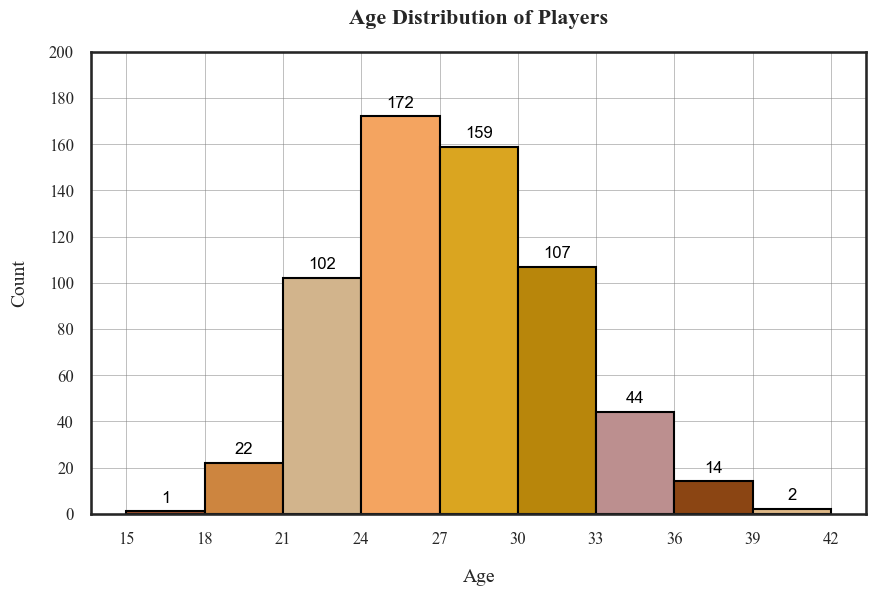

In [7]:
sns.set(style="white", context="talk")

plt.figure(figsize=(10, 6))

bins = [15, 18, 21, 24, 27, 30, 33, 36, 39, 42]

colors = ['#A0522D', '#CD853F', '#D2B48C', '#F4A460', '#DAA520', '#B8860B', '#BC8F8F', '#8B4513', '#DEB887']
ax = sns.histplot(data['Age'], bins=bins, kde=False, edgecolor='black')

for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i % len(colors)])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, '.0f'), 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=12, color='black')

x_ticks = [15, 18, 21, 24, 27, 30, 33, 36, 39, 42]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, fontsize=12, fontname='Times New Roman')

ax.set_ylim(0, 200)
ax.set_yticks(range(0, 201, 20))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.set_yticklabels(range(0, 201, 20), fontsize=12, fontname='Times New Roman')

ax.set_xlabel('Age', fontsize=14, labelpad=15, fontname='Times New Roman')
ax.set_ylabel('Count', fontsize=14, labelpad=15, fontname='Times New Roman')
ax.set_title('Age Distribution of Players', fontsize=16, pad=20, fontweight='bold', fontname='Times New Roman')

ax.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray', alpha=0.7)

plt.show()

We can see that most players age are between 24 to 30

## Height Distribution Of Players

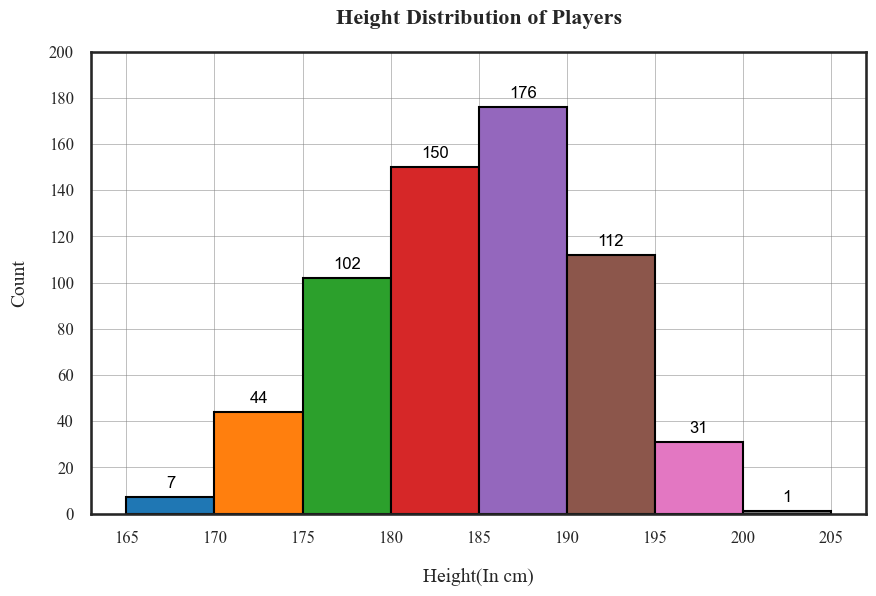

In [8]:
sns.set(style="white", context="talk")

plt.figure(figsize=(10, 6))

bins = [165, 170, 175, 180, 185, 190, 195, 200, 205]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

ax = sns.histplot(data["Height"], bins=bins, kde=False, edgecolor='black')

for i, patch in enumerate(ax.patches):
    patch.set_facecolor(colors[i % len(colors)])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height, '.0f'), 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize=12, color='black')

x_ticks = [165, 170, 175, 180, 185, 190, 195, 200, 205]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks, fontsize=12, fontname='Times New Roman')

ax.set_ylim(0, 180)
ax.set_yticks(range(0, 201, 20))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

ax.set_yticklabels(range(0, 201, 20), fontsize=12, fontname='Times New Roman')

ax.set_xlabel('Height(In cm)', fontsize=14, labelpad=15, fontname='Times New Roman')
ax.set_ylabel('Count', fontsize=14, labelpad=15, fontname='Times New Roman')
ax.set_title('Height Distribution of Players', fontsize=16, pad=20, fontweight='bold', fontname='Times New Roman')

ax.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray', alpha=0.7)

plt.show()

From the plot we can see that 176 players height are between 185 to 190 cm, which is the highest and 150 players height are between 180 to 185 cm, Which is the second highest

## Position Wise Number of Players

C:\Users\USER\AppData\Local\Temp\ipykernel_11116\738577096.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(), fontsize=12, fontname='Times New Roman')


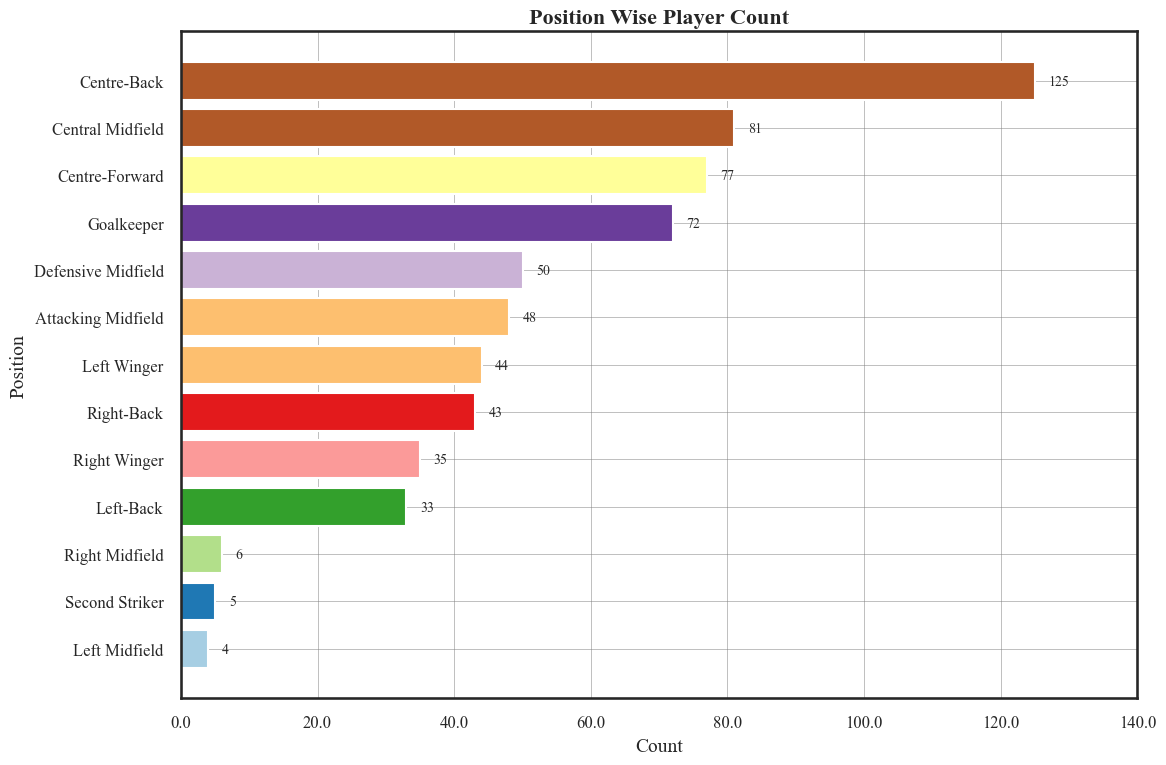

In [9]:
position = data["Position"].value_counts().sort_values(ascending=True)

unique_colors = plt.cm.Paired(np.linspace(0, 1, len(position)))

plt.figure(figsize=(12, 8))
ax = plt.gca()

bars = ax.barh(position.index, position.values, color=unique_colors)

for bar, count in zip(bars, position):
    ax.text(bar.get_width() + 2, bar.get_y() + bar.get_height() / 2, str(count), 
            ha='left', va='center', fontsize=10, fontname='Times New Roman')

ax.set_yticks(range(len(position)))
ax.set_yticklabels(position.index, fontsize=12, fontname='Times New Roman')

ax.set_xticklabels(ax.get_xticks(), fontsize=12, fontname='Times New Roman')

ax.set_xlabel('Count', fontsize=14, fontname='Times New Roman')
ax.set_ylabel('Position', fontsize=14, fontname='Times New Roman')
ax.set_title('Position Wise Player Count', fontsize=16, fontweight='bold', fontname='Times New Roman')

ax.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray', alpha=0.7)
plt.xlim(0, 140)
plt.tight_layout()

plt.show()

From the plot we can see that highest number of player plays in the position center-back which is 125.

## Top Scorer Among the Players

C:\Users\USER\AppData\Local\Temp\ipykernel_11116\1648042010.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


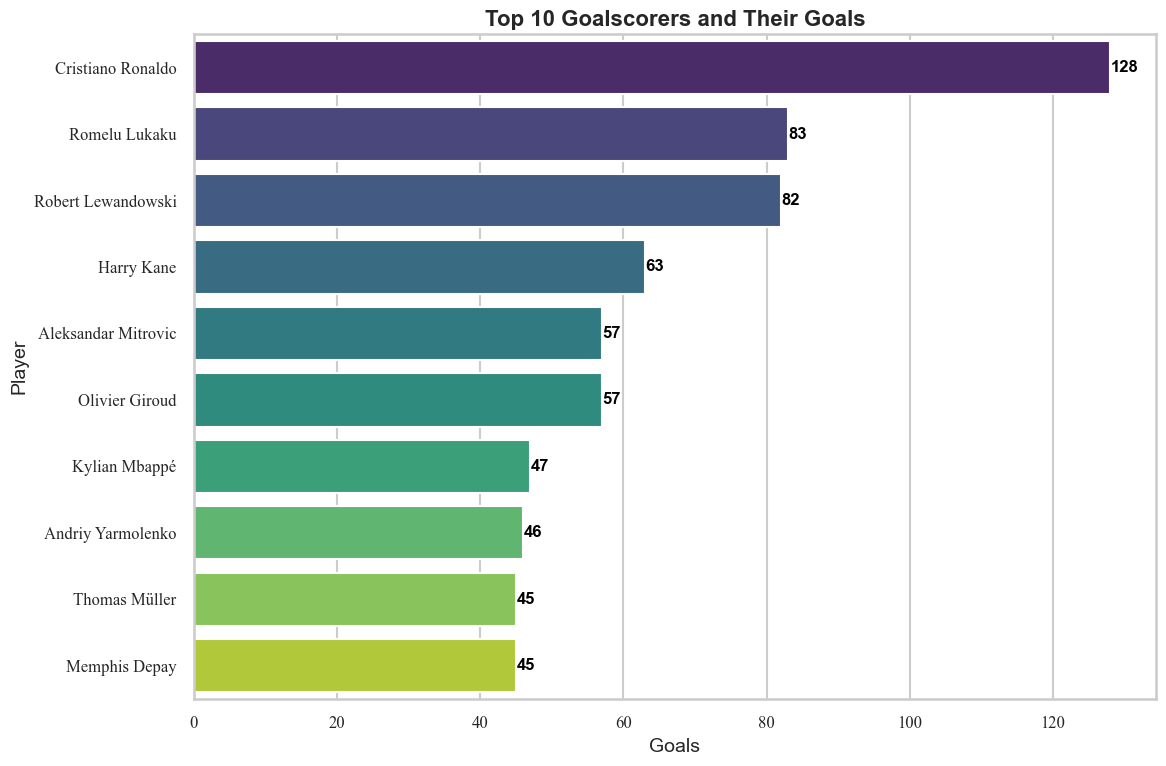

In [22]:
top_scorers = data[['Name', 'Goals']].nlargest(10, 'Goals')

# Set the style for the plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))

# Create the bar plot
bars = sns.barplot(
    x='Goals',
    y='Name',
    data=top_scorers,
    palette='viridis'
)

# Add text annotations on the bars
for bar in bars.patches:
    plt.text(
        bar.get_width() + 0.1,
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width())}',
        va='center',
        ha='left',
        fontsize=12,
        color='black',
        weight='bold'
    )

# Set title and labels
plt.title('Top 10 Goalscorers and Their Goals', fontsize=16, weight='bold')
plt.xlabel('Goals', fontsize=14)
plt.ylabel('Player', fontsize=14)

# Adjust x-axis label font size
plt.yticks(fontsize=12, fontname='Times New Roman')
plt.xticks(fontsize=12, fontname='Times New Roman')
# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

From the plot we can see that Cristiano Ronaldo top scorer among all the players in the league with 128 goal. Romelu Lukaku and Robert Lewan

C:\Users\USER\AppData\Local\Temp\ipykernel_11116\1663472815.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


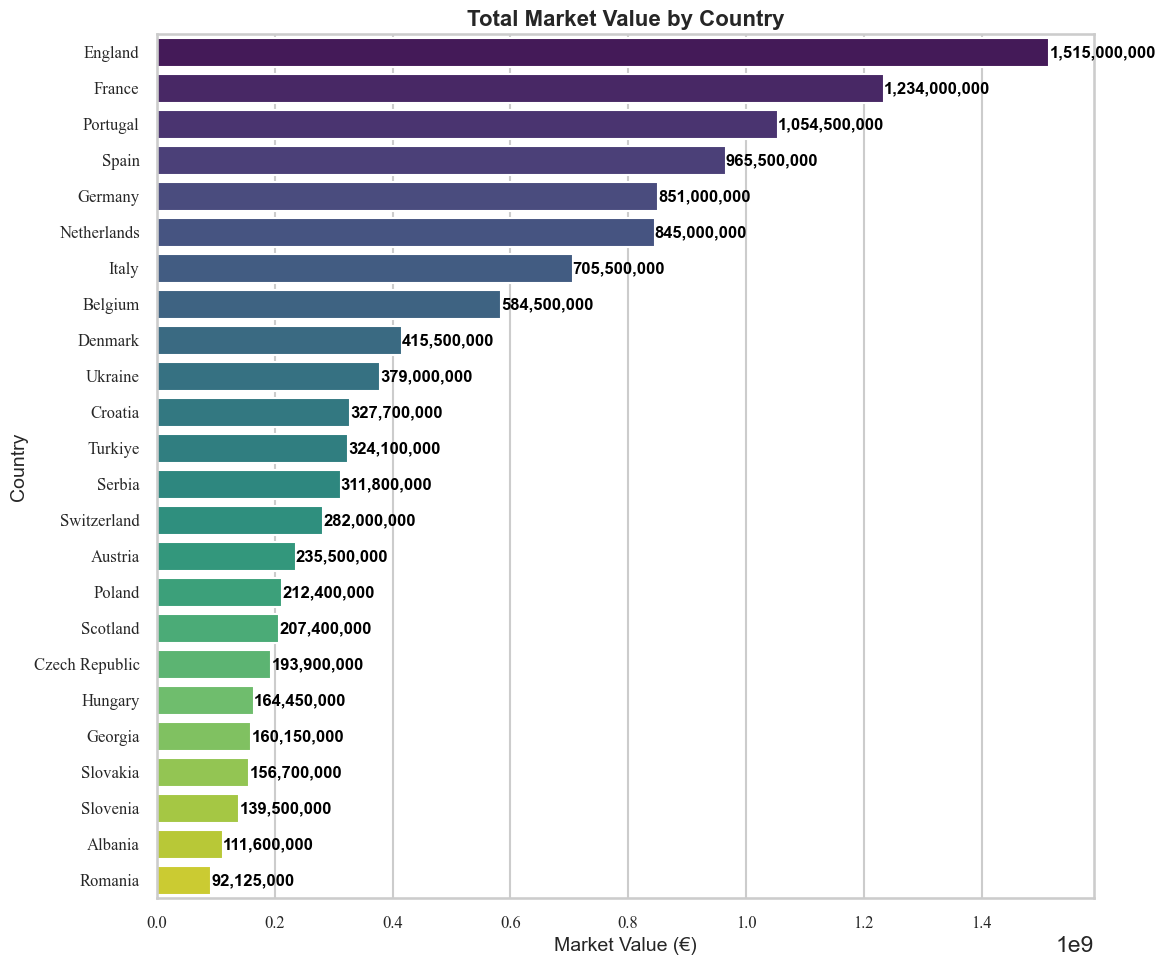

In [28]:
country_market_value = data.groupby('Country')['MarketValue'].sum().reset_index()

# Sort the values in descending order
country_market_value = country_market_value.sort_values(by='MarketValue', ascending=False)

# Plot the total market value country-wise
plt.figure(figsize=(12, 10))
bars = sns.barplot(
    x='MarketValue',
    y='Country',
    data=country_market_value,
    palette='viridis'
)

# Add text annotations on the bars
for bar in bars.patches:
    plt.text(
        bar.get_width() + 10,
        bar.get_y() + bar.get_height() / 2,
        f'{int(bar.get_width()):,}',
        va='center',
        ha='left',
        fontsize=12,
        color='black',
        weight='bold'
    )

# Set title and labels
plt.title('Total Market Value by Country', fontsize=16, weight='bold')
plt.xlabel('Market Value (€)', fontsize=14)
plt.ylabel('Country', fontsize=14)

plt.yticks(fontsize=12, fontname='Times New Roman')
plt.xticks(fontsize=12, fontname='Times New Roman')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()